# Mushroom Classification

In this project, we will determine if a mushroom is **edible** or **poisonous** by its specification.
The dataset for this project is stored in **"mushroom.csv"** file.
The dataset contain **8124** entries and have 23 features. The description of the features are in the **feature_description.pdf** file.
The dataset is made available by UCI MAchine Learning.






In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')



Read the csv file.
read_csv() function of pandas library will read the csv file 

In [2]:

data = pd.read_csv("../data/raw/mushrooms.csv")


# Examine the dataset

Let's examine the dataset with the help of **head(), info(), describe()** methods.

In [27]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.shape

(8124, 23)

# Visualizing the label (class column)

Count the total number of entries and total number of unique values in the class column

In [7]:
count = data['class'].value_counts()

In [8]:
data['class'].unique()

array(['p', 'e'], dtype=object)

Plot the count of "class" column 

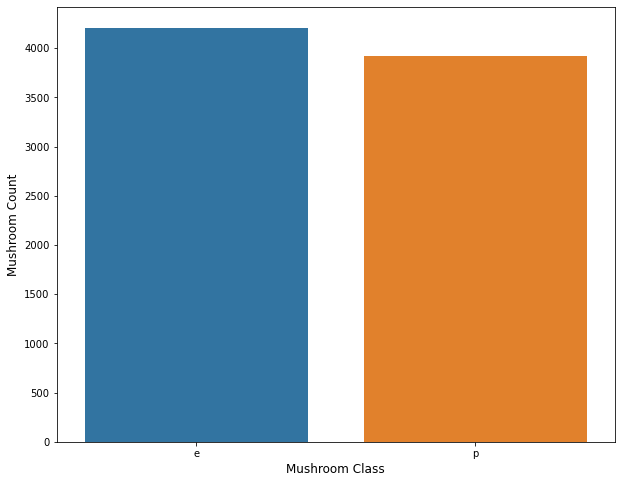

In [9]:
plt.figure(figsize=(10, 8))
sns.barplot(x=count.index, y=count.values)
plt.xlabel('Mushroom Class', fontsize=12)
plt.ylabel('Mushroom Count', fontsize=12)
# plt.savefig('labelcount.png', format='png', dpi=900)
plt.show()

dataset is balanced

# Data Manipulation

All of the data is of "object type". So, we need to convert it into numerical type.

In [10]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Use **LabelEncoder()** to encode the object data into integer.

In [11]:
label_encoder = LabelEncoder()
for col in data.columns:
  data[col] = label_encoder.fit_transform(data[col])

Examine the data to see if everything works correctly

In [12]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Let's plot and examine the data.

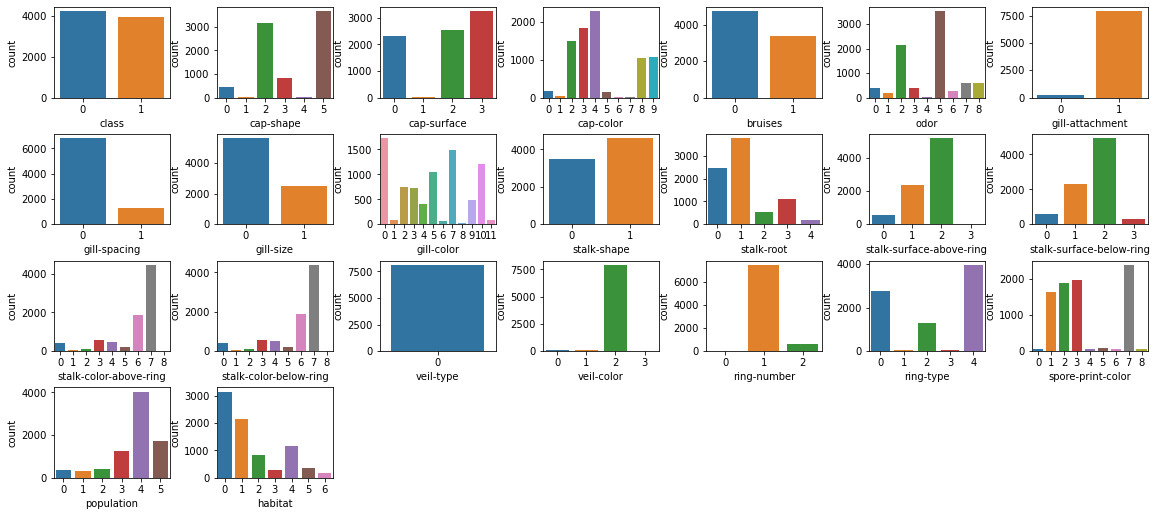

In [13]:
figure = plt.figure(figsize=(19 , 19))
for i, c in enumerate(data.columns):
  figure.add_subplot(10, 7, i+1)
  sns.countplot(x = f"{c}", data=data)
  plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
# plt.savefig('cat.png', format='png', dpi=1200)
plt.show()

As, we can see in the above plot the column **"veil-type"** is of same type and not contributing much.
So, let's drop that column

In [14]:
data.drop('veil-type', axis=1, inplace=True)

# Preparing data

Distribute the data into features(X) and label(y)

In [15]:
X = data.drop('class', axis=1)
y = data['class']

Distribute the data into training and testing data with the help of train_test_split function

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Classification Methods

Function to train and predict data

In [17]:
def train_and_predict(clf):
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  return pred

Function to get accuracy score

In [18]:
def train_predict_accuracy(clf):
  pred = train_and_predict(clf)
  return accuracy_score(y_test, pred)
  

Initializing all the classifiers



In [19]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
nb_clf = GaussianNB()
lr_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()

training and predicting data

In [20]:
classifiers = [dt_clf, rf_clf, nb_clf, lr_clf, svc_clf, knn_clf]
accuracy_score_dict = {}

for clf in classifiers:
  accuracy = train_predict_accuracy(clf)
  accuracy_score_dict[clf.__class__.__name__] = accuracy

In [21]:
print("Accuracy Score :\n")
for k, v in accuracy_score_dict.items():
  print(f"{k} : {v * 100 :.2f}%")

Accuracy Score :

DecisionTreeClassifier : 100.00%
RandomForestClassifier : 100.00%
GaussianNB : 93.02%
LogisticRegression : 95.35%
SVC : 98.95%
KNeighborsClassifier : 99.66%


Most classifiers provide almost 100% accuracy

In [22]:
important_features = clf.feature_importances_
sorted_indexes = np.argsort(important_features)
features_list = X.columns.values

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

Plot the feature importance

In [ ]:
plt.figure(figsize=(12, 7))
plt.barh(range(len(sorted_indexes)), important_features[sorted_indexes], align='center', color='purple')
plt.yticks(range(len(sorted_indexes)), features_list[sorted_indexes])
plt.xlabel("Importance")
# plt.savefig("feature_importance.png", format='png', dpi=900)
plt.show()

Most important feature is **"gill-color"**

Some classifiers have 100% accuracy while some have 98, 93. So, let's check those classifiers whose accuracy is less than 100 with confusion matrix.

Function to get and plot confusion matrix

In [ ]:
def c_matrix(pred, name):
  cm = confusion_matrix(y_test, pred)
  x_axis_labels = ["Edible", "Poisonous"]
  y_axis_labels = ["Edible", "Poisonous"]
  f, ax = plt.subplots(figsize =(7,7))
  sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.xlabel("PREDICTED LABEL")
  plt.ylabel("TRUE LABEL")
  plt.title(f'Confusion Matrix of {name}');
  plt.savefig(f"{name}_c_matrix.png", format='png', dpi=900, bbox_inches='tight')
  plt.show()

Confusion Matrix for GaussianNB

In [ ]:
nb_pred = train_and_predict(nb_clf)

c_matrix(nb_pred, 'GaussianNB')

Confusion Matrix for Logistic Regression

In [ ]:
lr_pred = train_and_predict(lr_clf)

c_matrix(lr_pred, 'LogisticReression')


Confusion Matrix for SVC

In [ ]:
svc_pred = train_and_predict(svc_clf)
c_matrix(svc_pred, 'SVC')

Confusion Matrix for Knn classifier

In [ ]:
knn_pred = train_and_predict(knn_clf)
c_matrix(knn_pred, 'KNNClassifier')

# Conclusion

So, the best performing models are :


*   DecisionTreeClassifier
*   RandomForestClassifier

and, the worst performing model in this case is:




*   GaussianNB

and the other models (LogisticRegression and SVC) provide pretty good accuracy.



